# Milestone 1

Nama  : Basyira Sabita  \
Batch : HCK-012

**Objektif:**   
Program ini bertujuan untuk menganalisis perilaku booking hotel berjenis resort dengan meningkatkan *occupancy rate*-nya sebagai target.

[Tableau Visualisasi dan Analisis](https://public.tableau.com/app/profile/basyira.sabita/viz/Milestone1-HotelBookingDemand/Visualisasi)

---

## **Identifikasi Masalah**

### Latar Belakang

Tim manajemen *hotel-chain* XYZ memiliki Resort A yaitu sebuah resort baru yang sudah beroperasi selama hampir 6 bulan (Q2). Selama beroperasi, pemasukan hotel tidak mencapai perkiraan sehingga dikhawatirkan modal awal tidak akan tertutup sesuai dengan target awal yang sudah ditentukan. Pemasukan tidak mencapai perkiraan dikarenakan *occupancy rate* tidak mencapai perkiraan awal. Untuk itu, tim manajemen ingin meningkatkan *occupancy rate* sehingga pemasukan dapat bertambah dan target modal awal tertutup target modal awal tertutup bisa tetap dicapai dengan tepat waktu. 

### Analisis SMART

**Specific:**  
Meningkatkan *occupancy rate* pada resort.

**Measurable:**  
*Occupancy rate* pada resort bertambah 10% dari sebelumnya.

**Achievable:**  
Menganalisis tren booking untuk menyusun strategi *customer acquisition* dengan menentukan harga dan promosi yang tepat.

**Relevant:**  
Meningkatnya occupancy rate dapat secara langsung meningkatkan pemasukan hotel.

**Time-bound:**  
Goal harus dicapai dalam dua quarter ke depan (akhir Q4)

### Problem Statement

Target yang perlu dicapai adalah meningkatkan *occupancy rate* pada resort sebanyak 10% dari *occupancy rate* sebelumnya. Target ini akan dicapai dengan fokus Menganalisis tren booking untuk menyusun strategi *customer acquisition* dengan menentukan harga dan promosi yang tepat sehingga dapat meningkatkan pemasukan. Ketika target tercapai pemasukan hotel juga akan meningkat.

### Penjabaran Masalah dengan 5W+1H

- Bagaimana pemusatan data dan distribusi rata-rata rate harian pada resort?
- Pada bulan apa resort paling banyak di-booking?
- Bagaimana perbandingan tren rata-rata rate per malam pada Q3 - Q4 di tiap tahunnya?
- Bagaimana perbandingan persentase segmentasi customer yang menginap di resort?
- Bagaimana persentase status reservasi pada Q3 dan Q4?
- Apakah terdapat perbedaan rata-rata keseluruhan pada rata-rata rate per malam ketika akhir pekan, hari kerja, dan keduanya?

Seluruh pertanyaan penjabaran masalah dapat dianalisis dengan menggunakan dataset **Hotel Booking Demand** sebagai acuan analisis data untuk tim manajemen *hotel-chain* XYZ

## **Data Loading**

Sumber data: [Hotel Booking Demand Dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/)

In [51]:
# import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [52]:
# Membaca data dari csv
df = pd.read_csv('dataset/hotel_booking.csv')

df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


Setelah load data dari sumber dengan menggunakan method read_csv, terlihat bahwa variabel `df` sudah menyimpan data dari sumber data karena tidak ada pesan error dan data berhasil ditampilkan. Terdapat **119390 baris data** dan **36 kolom**. 

In [53]:
# Melihat informasi dan properti data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Berdasarkan informasi data, terlihat bahwa terdapat **4 kolom** bertipe data **float64**, **16 kolom** bertipe data **int64**, dan **16 kolom** bertipe data **object**. Range index data dari **0 hingga 119389** karena terdapat 119390 data. Terdapat **36 kolom** dalam data. Dapat diketahui pula bahwa data sudah disimpan dalam variabel df yang bertipe **pandas DataFrame**. Dapat diketahui pula bahwa masih **terdapat kolom yang memiliki nilai null** karena terdapat kolom dengan jumlah non-null value kurang dari jumlah seluruh baris data (11930 data).

In [54]:
# Mencari jumlah kolom yang memiliki nilai null serta jumlahnya
cols = df.columns
nullSum = df.isnull().sum()
num = 1

for i in range(0, len(cols)):
    if nullSum.iloc[i] != 0:
        print(f'{num}. Kolom {cols[i]} - Jumlah nilai null: {nullSum.iloc[i]}')
        num += 1

1. Kolom children - Jumlah nilai null: 4
2. Kolom country - Jumlah nilai null: 488
3. Kolom agent - Jumlah nilai null: 16340
4. Kolom company - Jumlah nilai null: 112593


Terdapat **empat kolom** yang memiliki nilai null. Pertama ada kolom `children` memiliki jumlah nilai null sebanyak 4. Kedua ada kolom `country` memiliki jumlah nilai null sebanyak 488. Ketiga ada kolom `agent` memiliki jumlah nilai null sebanyak 16340. Kolom `company` memiliki jumlah nilai null sebanyak 112593.

Langkah selanjutnya adalah data perlu dilakukan dibersihkan sebelum dapat dianalisis agar hasil analisis efektif dan akurat.

## **Data Cleaning**

### Copy data untuk dibersihkan

In [55]:
# Mengcopy df ke dalam dataframe baru
df_copy = df.copy()

df_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


Terlihat bahwa data sudah berhasil di-copy ke dalam variable `df_copy`.

### Filter data booking dengan jenis hotel resort

Data yang perlu digunakan hanya data booking pada resort. Untuk itu, perlu dilakukan filter agar data yang diolah hanya yang dimiliki oleh resort.

In [56]:
# Menyimpan data booking pada jenis hotel resort sebagai acuan
resort_df = df_copy[df_copy['hotel'] == 'Resort Hotel']

resort_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,Transient,89.75,0,0,Check-Out,2017-09-10,Willie Hamilton,Hamilton_Willie@mail.com,172-436-4780,************5145
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,Transient-Party,202.27,0,1,Check-Out,2017-09-10,Carrie Walker,Carrie_Walker@yahoo.com,141-149-4764,************9816
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,Transient,153.57,0,3,Check-Out,2017-09-12,Joshua Small,Joshua_Small@aol.com,769-653-1129,************7686
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,Contract,112.80,0,1,Check-Out,2017-09-14,Michele Hanson,MHanson@yahoo.com,670-269-4799,************8961


Terlihat bahwa variabel `resort_df` sudah menyimpan seluruh data booking pada jenis hotel resort. Total data booking resort adalah 40060 data.

### Melakukan *handling missing value*

In [57]:
# Mencari kolom yang memiliki nilai null serta jumlahnya
cols = resort_df.columns
nullSum = resort_df.isnull().sum()
num = 1

for i in range(0, len(cols)):
    if nullSum.iloc[i] != 0:
        print(f'{num}. Kolom {cols[i]} - Jumlah nilai null: {nullSum.iloc[i]}')
        num += 1
        
if num == 1:
    print('Tidak terdapat missing value pada seluruh kolom')

1. Kolom country - Jumlah nilai null: 464
2. Kolom agent - Jumlah nilai null: 8209
3. Kolom company - Jumlah nilai null: 36952


Terlihat bahwa terdapat 3 kolom yang masih memiliki nilai null yaitu kolom `country` sebanyak **464 data**, `agent` sebanyak **8209 data**, dan `company` dengan **36952 data**. Kolom `agent` dan `company` memiliki jumlah data null yang signifikan terhadap total seluruh data sehingga lebih baik kolom `agent` dan `company` dihapus saja. Kemudian, nilai null pada kolom `country` akan diisi dengan string 'N.S' yang berarti '*Not Specified*'.

In [58]:
# hapus kolom agent dan company
resort_cleaned_df = resort_df.drop(['agent', 'company'], axis = 1)

# mengisi nilai null pada kolom country dengan Not Specified
resort_cleaned_df['country'].fillna('N.S', inplace = True)

resort_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40060 entries, 0 to 40059
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           40060 non-null  object 
 1   is_canceled                     40060 non-null  int64  
 2   lead_time                       40060 non-null  int64  
 3   arrival_date_year               40060 non-null  int64  
 4   arrival_date_month              40060 non-null  object 
 5   arrival_date_week_number        40060 non-null  int64  
 6   arrival_date_day_of_month       40060 non-null  int64  
 7   stays_in_weekend_nights         40060 non-null  int64  
 8   stays_in_week_nights            40060 non-null  int64  
 9   adults                          40060 non-null  int64  
 10  children                        40060 non-null  float64
 11  babies                          40060 non-null  int64  
 12  meal                            40060

In [59]:
# Mencari kolom yang memiliki nilai null serta jumlahnya
cols = resort_cleaned_df.columns
nullSum = resort_cleaned_df.isnull().sum()
num = 1

for i in range(0, len(cols)):
    if nullSum.iloc[i] != 0:
        print(f'{num}. Kolom {cols[i]} - Jumlah nilai null: {nullSum.iloc[i]}')
        num += 1
        
if num == 1:
    print('Tidak terdapat missing value pada seluruh kolom')

Tidak terdapat missing value pada seluruh kolom


Terlihat pada informasi bahwa jumlah kolom sudah berubah menjadi 34 kolom karena kolom `agent` dan `company` sudah berhasil dihapuskan. Kemudian, nilai null pada `country` sudah berhasil di-*handle* karena terlihat bahwa sudah tidak ada null value yang terdeteksi pada data. 

### Melakukan pengecekan apakah ada duplikasi data dan hapus kolom yang tidak diperlukan

In [60]:
# Mengembalikan data yang unik
resort_cleaned_df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,Transient,89.75,0,0,Check-Out,2017-09-10,Willie Hamilton,Hamilton_Willie@mail.com,172-436-4780,************5145
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,Transient-Party,202.27,0,1,Check-Out,2017-09-10,Carrie Walker,Carrie_Walker@yahoo.com,141-149-4764,************9816
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,Transient,153.57,0,3,Check-Out,2017-09-12,Joshua Small,Joshua_Small@aol.com,769-653-1129,************7686
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,Contract,112.80,0,1,Check-Out,2017-09-14,Michele Hanson,MHanson@yahoo.com,670-269-4799,************8961


Terlihat bahwa setiap row data **sudah dipastikan unik** terlihat dari jumlah row data sama dengan data sebelum dihapus duplikatnya yaitu **40060 data**. Hal ini berarti **kolom yang tidak diperlukan dalam analisis dapat dihapuskan**. Dalam konteks ini, kolom yang tidak berhubungan dengan analisis adalah **data tentang informasi personal customer** pada setiap bookingnya.

In [61]:
# Hapus kolom yang berisi informasi personal customer
resort_cleaned_df.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace = True)

resort_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40060 entries, 0 to 40059
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           40060 non-null  object 
 1   is_canceled                     40060 non-null  int64  
 2   lead_time                       40060 non-null  int64  
 3   arrival_date_year               40060 non-null  int64  
 4   arrival_date_month              40060 non-null  object 
 5   arrival_date_week_number        40060 non-null  int64  
 6   arrival_date_day_of_month       40060 non-null  int64  
 7   stays_in_weekend_nights         40060 non-null  int64  
 8   stays_in_week_nights            40060 non-null  int64  
 9   adults                          40060 non-null  int64  
 10  children                        40060 non-null  float64
 11  babies                          40060 non-null  int64  
 12  meal                            40060

Terlihat dari informasi di atas, dapat diketahui bahwa kolom terkait informasi personal customer sudah berhasil dihapuskan.

### Menghapus data irasional

Dalam konteks ini, data irasional merupakan data yang seharusnya memiliki nilai. Data irasional yang dimaksud adalah jumlah malam menginap dan jumlah tamu dewasa >= 1. Hal ini dikarenakan setiap booking yang terbuat seharusnya mencatat durasi malam menginap dan booking hanya bisa dibuat oleh orang dewasa. Data irasional tersebut harus dihapus agar data benar secara logika. 

In [62]:
# Hanya menyimpan yang tamu dewasa dan jumlah malam menginap lebih dari 0
resort_cleaned_df = resort_cleaned_df[(resort_cleaned_df['adults'] > 0) & (resort_cleaned_df['stays_in_week_nights'] + resort_cleaned_df['stays_in_weekend_nights'] > 0)].reset_index()

# Drop kolom index karena booking id sudah di reset
resort_cleaned_df.drop('index', axis=1, inplace=True)

resort_cleaned_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39661,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,2017-09-10
39662,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
39663,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,2017-09-12
39664,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,2017-09-14


Terlihat bahwa data irasional sudah berhasil dihapuskan sehingga jumlah data berkurang menjadi 39666 data.

### Mengganti tipe data kolom `children`

Tipe data kolom `children` perlu diubah dari float64 menjadi int64 karena jumlah anak hanya mungkin bilangan bulat.

In [63]:
# Mengubah data type kolom arrival_date
resort_cleaned_df['children'] = resort_cleaned_df['children'].astype('int64')

resort_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39666 entries, 0 to 39665
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           39666 non-null  object 
 1   is_canceled                     39666 non-null  int64  
 2   lead_time                       39666 non-null  int64  
 3   arrival_date_year               39666 non-null  int64  
 4   arrival_date_month              39666 non-null  object 
 5   arrival_date_week_number        39666 non-null  int64  
 6   arrival_date_day_of_month       39666 non-null  int64  
 7   stays_in_weekend_nights         39666 non-null  int64  
 8   stays_in_week_nights            39666 non-null  int64  
 9   adults                          39666 non-null  int64  
 10  children                        39666 non-null  int64  
 11  babies                          39666 non-null  int64  
 12  meal                            

Terlihat bahwa tipe data kolom `children` sudah berubah menjadi int64.

### Menggabungkan kolom tanggal kedatangan

Terlihat pada tabel bahwa tanggal kedatangan dipisah menjadi beberapa kolom `arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month` agar pengolahan data lebih mudah diperlukan satu kolom yang menyimpan tanggal dengan tipe data datetime.

In [64]:
# Mengganti nama bulan menjadi angka
monthMap = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12',
}

# Membuat kolom baru berisi angka bulan kedatangan
resort_cleaned_df['arrival_date_month_num'] = resort_cleaned_df.arrival_date_month.map(monthMap)

# Mengubah data type kolom arrival_date
resort_cleaned_df['arrival_date_month_num'] = resort_cleaned_df['arrival_date_month_num'].astype('int64')

resort_cleaned_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,7
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,7
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,7
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,7
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39661,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,1,No Deposit,0,Transient,89.75,0,0,Check-Out,2017-09-10,8
39662,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,8
39663,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,0,No Deposit,0,Transient,153.57,0,3,Check-Out,2017-09-12,8
39664,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,0,No Deposit,0,Contract,112.80,0,1,Check-Out,2017-09-14,8


In [65]:
resort_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39666 entries, 0 to 39665
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           39666 non-null  object 
 1   is_canceled                     39666 non-null  int64  
 2   lead_time                       39666 non-null  int64  
 3   arrival_date_year               39666 non-null  int64  
 4   arrival_date_month              39666 non-null  object 
 5   arrival_date_week_number        39666 non-null  int64  
 6   arrival_date_day_of_month       39666 non-null  int64  
 7   stays_in_weekend_nights         39666 non-null  int64  
 8   stays_in_week_nights            39666 non-null  int64  
 9   adults                          39666 non-null  int64  
 10  children                        39666 non-null  int64  
 11  babies                          39666 non-null  int64  
 12  meal                            

Untuk memudahkan convert menjadi tipe data datetime, kolom `arrival_date_month` perlu diubah dari nama bulan menjadi angka bulannya. Berdasarkan table di atas, terlihat bahwa kolom baru `arrival_date_month_num` sudah ditambahkan dan tipe datanya adalah int64.

In [66]:
arr_dates = []

# looping setiap data tanggal di resort_cleaned_df
for i in range(0, len(resort_cleaned_df)):
    year = resort_cleaned_df['arrival_date_year'][i]
    month = resort_cleaned_df['arrival_date_month_num'][i]
    day = resort_cleaned_df['arrival_date_day_of_month'][i]
    date = f'{year}-{month}-{day}'

    arr_dates.append(date)

# Membuat kolom arrival_date
resort_cleaned_df['arrival_date'] = arr_dates

# Mengubah data type kolom arrival_date
resort_cleaned_df['arrival_date'] = resort_cleaned_df['arrival_date'].astype('datetime64[ns]')

resort_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39666 entries, 0 to 39665
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           39666 non-null  object        
 1   is_canceled                     39666 non-null  int64         
 2   lead_time                       39666 non-null  int64         
 3   arrival_date_year               39666 non-null  int64         
 4   arrival_date_month              39666 non-null  object        
 5   arrival_date_week_number        39666 non-null  int64         
 6   arrival_date_day_of_month       39666 non-null  int64         
 7   stays_in_weekend_nights         39666 non-null  int64         
 8   stays_in_week_nights            39666 non-null  int64         
 9   adults                          39666 non-null  int64         
 10  children                        39666 non-null  int64         
 11  ba

Terlihat bahwa pada tabel sudah berhasil ditambahkan kolom `arrival_date` dengan tipe data datetime64[ns].

### Mengganti nama kolom sehingga lebih deskriptif

Mengganti nama kolom `adr` menjadi `avg_daily_rate` sehingga dapat lebih mudah untuk diinterpretasikan.

In [67]:
# Mengganti nama kolom adr menjadi avg_daily_rate
resort_cleaned_df.rename(columns = {'adr':'avg_daily_rate'}, inplace = True) 

resort_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39666 entries, 0 to 39665
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           39666 non-null  object        
 1   is_canceled                     39666 non-null  int64         
 2   lead_time                       39666 non-null  int64         
 3   arrival_date_year               39666 non-null  int64         
 4   arrival_date_month              39666 non-null  object        
 5   arrival_date_week_number        39666 non-null  int64         
 6   arrival_date_day_of_month       39666 non-null  int64         
 7   stays_in_weekend_nights         39666 non-null  int64         
 8   stays_in_week_nights            39666 non-null  int64         
 9   adults                          39666 non-null  int64         
 10  children                        39666 non-null  int64         
 11  ba

Terlihat bahwa kolom `adr` sudah berubah namanya menjadi `avg_daily_rate`.

### Menambahkan kolom `booking_count`

Pada table perlu ditambahkan kolom `booking_count` untuk memudahkan analisis dan visualisasi.

In [68]:
booking_count = []

for i in range(0, len(resort_cleaned_df)):
    booking_count.append(1)

resort_cleaned_df['booking_count'] = booking_count

resort_cleaned_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date,booking_count
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,7,2015-07-01,1
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,7,2015-07-01,1
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,7,2015-07-01,1
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,7,2015-07-01,1
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,7,2015-07-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39661,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,0,Transient,89.75,0,0,Check-Out,2017-09-10,8,2017-08-31,1
39662,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,8,2017-08-30,1
39663,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,0,Transient,153.57,0,3,Check-Out,2017-09-12,8,2017-08-29,1
39664,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,0,Contract,112.80,0,1,Check-Out,2017-09-14,8,2017-08-31,1


Terlihat pada tabel sudah terdapat kolom baru `booking_count` yang dapat digunakan ketika melakukan pemanggilan fungsi agregat.

### Menyimpan data yang sudah dibersihkan

In [69]:
# Menyimpan ke csv
resort_cleaned_df.to_csv('dataset/resort_cleaned.csv', index=False)

Saat ini, data dengan 39666 baris data dan 33 kolom sudah dilakukan pembersihan sehingga sudah siap untuk diolah dan dianalisis.

## **Analisis dan Perhitungan**

### Persiapan Analisis

In [70]:
# Import lib warning
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [71]:
# Copy data untuk dianalisis
resort_analyze_df = pd.read_csv('dataset/resort_cleaned.csv')

resort_analyze_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date,booking_count
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,1
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,1
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.0,0,0,Check-Out,2015-07-03,7,2015-07-01,1


### Mengetahui *central tendency* dan distribusi rata-rata rate harga per malam

* Asumsi: nilai rata-rata rate perhari dalam euro (€)

In [72]:
# Mencari nilai rata-rata adr
meanAdr = resort_analyze_df['avg_daily_rate'].mean()
print(f'Nilai rata-rata keseluruhan rata-rata rate perhari (adr): €{meanAdr}')

# Mencari nilai median adr
medianAdr = resort_analyze_df['avg_daily_rate'].median()
print(f'Nilai median rata-rata rate perhari (adr): €{medianAdr}')

# Mencari nilai modus adr
modeAdr = resort_analyze_df['avg_daily_rate'].mode()[0]
print(f'Nilai modus rata-rata rate perhari (adr): €{modeAdr}')

Nilai rata-rata keseluruhan rata-rata rate perhari (adr): €95.89538546866335
Nilai median rata-rata rate perhari (adr): €76.0
Nilai modus rata-rata rate perhari (adr): €48.0


Nilai mean keseluruhan rata-rata rate perhari (adr) adalah **€95.89538546866335**, nilai mediannya adalah **€76.0**, dan nilai modusnya adalah **€48.0**. Dapat diketahui dari hasil perhitungan *central tendency*, terlihat bahwa nilai modus yang jauh lebih kecil dari nilai median dan nilai median jauh lebih kecil dari nilai mean (nilai modus < median < mean). Hal ini mengindikasikan bahwa data memiliki kecenderungan dalam distribusinya.  

In [73]:
# Mengetahui skewness dari adr
skewAdr = resort_analyze_df['avg_daily_rate'].skew()
print(f'Nilai skew rata-rata rate perhari (adr): {skewAdr}')

Nilai skew rata-rata rate perhari (adr): 1.2674179106372283


Terlihat bahwa nilai skewness rata-rata rate perhari (adr) adalah **1.2674179106372283**. Nilai skewness tersebut lebih dari 1 yang berarti data adr memiliki kecenderungan condong ke kiri yang tinggi (**_positive skewness_**). Data condong ke kiri artinya lebih banyak **outlier atau data anomali yang nilainya sangat besar** dibandingkan dengan data yang lain.

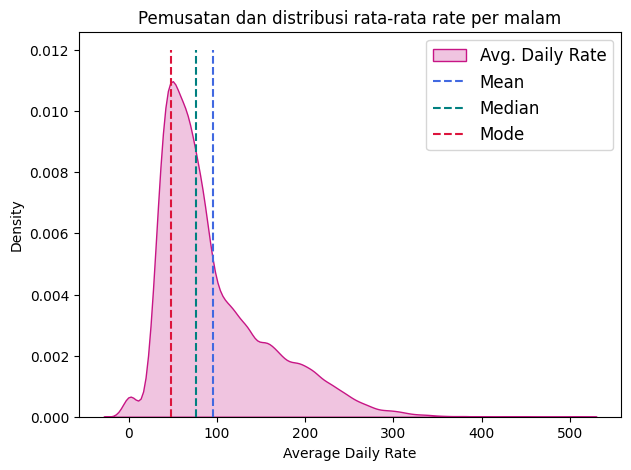

In [74]:
# Visualisasi central tendency dan distribusi data average daily price
adr = np.array(resort_analyze_df['avg_daily_rate'])

# Declare ukuran figure
plt.figure(figsize=(7,5))

# Menggunakan KDE Plot untuk melihat distribusi
sns.kdeplot(data = adr, color='mediumvioletred', fill=True)

# Properti figure
plt.title('Pemusatan dan distribusi rata-rata rate per malam')
plt.xlabel('Average Daily Rate')
plt.vlines(x=meanAdr, ymin=0, ymax=0.012, color='royalblue', linestyle='--')
plt.vlines(x=medianAdr, ymin=0, ymax=0.012, color='teal', linestyle='--')
plt.vlines(x=modeAdr, ymin=0, ymax=0.012, color='crimson', linestyle='--')
plt.legend(['Avg. Daily Rate', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Terlihat dari visualisasi distribusi data rata-rata rate per hari adalah sesuai dengan nilai skewnessny bahwa data cenderung padat ke kiri. Terlihat juga nilai outlier berada di sebelah kanan (nilainya sangat besar).

### Perbandingan jumlah booking berdasarkan bulan

In [75]:
# Mengelompokkan jumlah booking berdasarkan bulan
count_booking_by_mo_df = resort_analyze_df[['arrival_date_month', 'arrival_date_month_num','booking_count']]
count_booking_by_mo_df = count_booking_by_mo_df.groupby(['arrival_date_month', 'arrival_date_month_num']).count()

# Sort jumlah booking count berdasarkan bulannya
count_booking_by_mo_df.sort_values('arrival_date_month_num', inplace=True)
count_booking_by_mo_df.reset_index(inplace=True)

count_booking_by_mo_df

,arrival_date_month,arrival_date_month_num,booking_count
0,January,1,2159
1,February,2,3081
2,March,3,3305
3,April,4,3587
4,May,5,3520
5,June,6,3017
6,July,7,4532
7,August,8,4860
8,September,9,3100
9,October,10,3510


Terlihat bahwa `count_booking_by_mo_df` sudah menyimpan data jumlah booking yang dikelompokkan berdasarkan bulan kedatangannya. Data juga sudah disimpan secara berurutan dari bulan januari - desember.

In [76]:
# Mengambil hanya yang di Q3 dan Q4
count_booking_q34_df = count_booking_by_mo_df[count_booking_by_mo_df['arrival_date_month_num'] >= 7]

count_booking_q34_df

,arrival_date_month,arrival_date_month_num,booking_count
6,July,7,4532
7,August,8,4860
8,September,9,3100
9,October,10,3510
10,November,11,2403
11,December,12,2592


Target ingin dicapai pada akhir Q4 dan saat ini adalah Q2. Sehingga, analisis bisa difokuskan dengan melihat data pada Q3 dan Q4 saja. Terlihat bahwa `count_booking_q34_df` sudah menyimpan data booking count hanya dari bulan juli hingga desember saja.

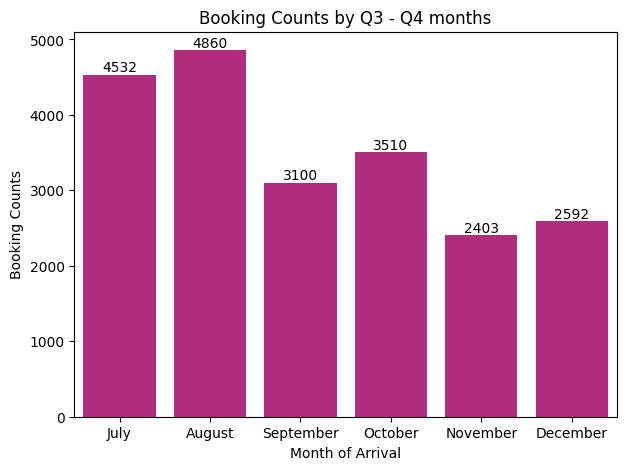

In [77]:
# Visualisasi jumlah booking yang ada pada tiap bulan
plt.figure(figsize=(7,5))

ax = sns.barplot(
    data=count_booking_q34_df, 
    x="arrival_date_month", 
    y='booking_count', 
    color='mediumvioletred'
)

# Properti figure
plt.xlabel('Month of Arrival')
plt.ylabel('Booking Counts')
plt.title('Booking Counts by Q3 - Q4 months')

label = ax.bar_label(ax.containers[0])

Berdasarkan visualisasi jumlah booking pada bulan-bulan di Q3 dan Q4, terlihat bahwa jumlah booking dibuat paling banyak pada bulan **Agustus** sebanyak **4860 booking**. Kemudian, diikuti oleh bulan **Juli** sebanyak **4532 booking**. Sementara itu, jumlah booking yang paling sedikit ada di bulan **November** sebanyak **2403 booking**. Terdapat perbedaan yang cukup jauh antara jumlah booking di bulan Agustus (terbanyak) dan bulan November (tersedikit) yaitu sebesar **2457 booking**. 

Apabila ingin dibuat suatu promosi sebagai upaya menaikkan pemasukan, sebaiknya perlu membedakan strategi promosi berdasarkan bulannya. Ketika bulan Juli - Agustus dimana traffic bookingnya tinggi dan asumsi jumlah kamar yang masih bisa disewakan sudah tinggal sedikit atau habis, lebih baik dibuat promosi yang **memaksimalkan pemasukan dari seluruh booking yang tidak dibatalkan dan _occupancy rate_-nya sedang maksimal**. Misalnya, dengan melakukan *upsell* dan menambahkan *add-ons* kepada tamu hotel ketika menginap. 

Sementara itu, promosi pada bulan November - Desember bisa difokuskan untuk menaikkan jumlah booking dan **memaksimalkan pemasukan dari bertambahnya jumlah booking** tersebut karena ketika jumlah bookingnya rendah dapat diasumsikan bahwa jumlah kamar yang dapat disewakan masih banyak. Sehingga, pemasukan dapat bertambah dengan menambahkan *occupancy rate*-nya

### Perbandingan tren rata-rata rate per malam pada Q3 - Q4 di tahun 2015 dan 2016

In [78]:
# Mengambil data rata-rata rate per hari pada Q3 - Q4 di tahun 2015 dan 2016
adr_year_df = resort_analyze_df.loc[(resort_analyze_df['arrival_date_month_num'] > 6) & (resort_analyze_df['arrival_date_year'] < 2017)]

# Mencari nilai mean dengan dikelompokkan berdasarkan setiap bulan dan tahun
mean_adr_year_df = adr_year_df[['arrival_date_year', 'arrival_date_month', 'arrival_date_month_num', 'avg_daily_rate']].groupby(['arrival_date_month_num', 'arrival_date_month', 'arrival_date_year']).mean()

# Menjadikan tahun sebagai kolom
mean_adr_year_df = mean_adr_year_df.sort_values(['arrival_date_year', 'arrival_date_month_num']).reset_index()
mean_adr_year_df = mean_adr_year_df.pivot_table('avg_daily_rate', ['arrival_date_month', 'arrival_date_month_num'], 'arrival_date_year')

# Membersihkan index
mean_adr_year_df.sort_values('arrival_date_month_num', inplace=True)
mean_adr_year_df.reset_index(inplace=True)

mean_adr_year_df

arrival_date_year,arrival_date_month,arrival_date_month_num,2015,2016
0,July,7,127.833108,156.980883
1,August,8,157.446624,192.443457
2,September,9,81.065815,106.443472
3,October,10,57.105652,67.460489
4,November,11,46.813961,50.730137
5,December,12,66.310323,74.267369


Terlihat bahwa `mean_adr_year_df` sudah menyimpan rata-rata keseluruhan dari rata-rata rate per hari berdasarkan bulan dan tahunnya. Data juga sudah diurutkan berdasarkan bulannya. Tahun 2015 dan 2016 dijadikan kolom agar bentuk tabelnya lebih efektif dan pengaksesannya lebih mudah.

In [79]:
# Membuat dataframe baru
mean_adr_df = pd.DataFrame({
    'month': ['July', 'August', 'September', 'October', 'November', 'December'],
    '2015': mean_adr_year_df[2015].to_list(),
    '2016': mean_adr_year_df[2016].to_list()
})

# Menjadikan bulan sebagai index
mean_adr_df.set_index('month', inplace=True)

mean_adr_df

,2015,2016
month,,
July,127.833108,156.980883
August,157.446624,192.443457
September,81.065815,106.443472
October,57.105652,67.460489
November,46.813961,50.730137
December,66.310323,74.267369


Terlihat bahwa sudah ada dataframe yang baru dibuat yaitu `mean_adr_df`. `mean_adr_df` sudah siap untuk divisualisasikan.

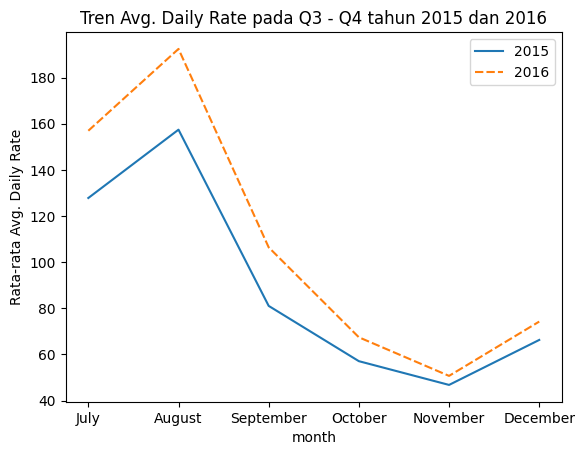

In [80]:
# Visualisasi tren harga pada Q3 - Q4 pada tahun 2015 dan 2016
sns.lineplot(data=mean_adr_df[['2015', '2016']])

# Properti figure
plt.title('Tren Avg. Daily Rate pada Q3 - Q4 tahun 2015 dan 2016')
plt.ylabel('Rata-rata Avg. Daily Rate')
plt.show()

Terlihat dari line chart di atas bahwa tren rata-rata keseluruhan rata-rata rate per hari pada tahun 2016 selalu berada di atas tren rate di tahun 2015. Hal ini berarti resort memasang harga yang lebih tinggi pada tahun 2016 daripada tahun 2015. Rata-rata rate per malam paling tinggi ada di bulan Agustus dan diikuti oleh bulan Juli. Tren rata-rata rate ini selaras dengan jumlah booking yang paling banyak ada di bulan Juli - Agustus. Dapat diketahui bahwa resort menaikkan rate per malam sesuai dengan demand-nya yang tinggi. Sesuai dengan jumlah booking pula, bulan November memiliki rata-rata rate paling rendah dibanding dengan bulan lain di Q3 - Q4. Untuk itu, pada bulan November jangan menaikkan rate per malam secara signifikan karena dikhawatirkan traffic booking semakin rendah. 

Walaupun secara umum tren rata-rata rate perhari mengikuti jumlah bookingnya, pada bulan Oktober yang dapat menjadi peluang untuk menambahkan pemasukkan. Dilihat dari jumlah bookingnya, bulan Oktober memiliki lebih banyak demand dibandingkan bulan September. Untuk itu, rata-rata rate per hari di Oktober bisa lebih dinaikkan. Tetapi, tetap harus mempertahankan traffic booking dan *occupancy rate*-nya. Sehingga, sebaiknya rate jangan dinaikkan secara signifikan.

### Perbandingan persentase segmentasi customer yang menginap di resort

Segmentasi customer yang menginap di resort perlu diketahui sehingga strategi promosi dapat memprioritaskan segmen customer terbesar menjadi target utama campaign.

Untuk mengetahui segmentasi customer perlu dibuat sebuah kategori sesuai dengan komposisi customer (adults, children, dan babies) yang menginap. Pembagian kategori adalah sebagai berikut:
1. Single: 1 Adult
2. Couple: 2 Adults
3. Family: Min. 1 Adult + Min. 1 child dan/atau 1 baby 
4. Small Groups: 3 - 10 Adults 
5. Big Groups: >10 Adults

In [81]:
# list kategori
category = ['family', 'single', 'couple', 'group']
guest_category = []
guest_category_count = [0, 0, 0, 0]

# Assign kategori sesuai ketentuan tamu berdasarkan komposisi customer
# Looping setiap row data pada resort analyze df
for i in resort_analyze_df.index:
    n_adults = resort_analyze_df['adults'][i]
    n_children = resort_analyze_df['children'][i]
    n_babies = resort_analyze_df['babies'][i]

    if n_adults > 0 and (n_children > 0 or n_babies > 0): # Masuk ke kategori family
        guest_category.append('family')
        guest_category_count[0] += 1
    elif n_adults == 1: # Masuk ke kategori single
        guest_category.append('single')
        guest_category_count[1] += 1
    elif n_adults == 2: # Masuk ke kategori couple
        guest_category.append('couple')
        guest_category_count[2] += 1
    else: # Masuk ke kategori group
        guest_category.append('group')
        guest_category_count[3] += 1

print(category)
print(guest_category_count)
print(len(guest_category))

['family', 'single', 'couple', 'group']
[3904, 6905, 27793, 1064]
39666


In [82]:
resort_analyze_df['guest_category'] = guest_category

resort_analyze_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date,booking_count,guest_category
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1,single
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1,single
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,1,couple
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,1,couple
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,7,2015-07-01,1,couple


Telihat bahwa jumlah setiap kategori sudah berhasil disimpan di `guest_category_count`. Setiap kategori pada `guest_category` memiliki nilainya jumlahnya masing-masing. Untuk memastikan bahwa jumlah masing-masing kategori benar, maka index dari `category` dan `guest_category_count` harus sama.

Telihat bahwa booking untuk kategori **Family** ada sebanyak **3904 data**, **Single** ada sebanyak **6905 data**, **Couple** ada sebanyak **27793 data**, dan **Group** ada sebanyak **1064 data**.

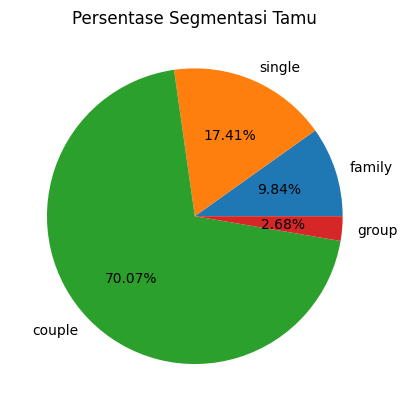

In [95]:
# Visualisasi persentase setiap segmen pada booking
plt.pie(guest_category_count, labels=category, autopct='%.2f%%') 

# Properti figure
plt.title('Persentase Segmentasi Tamu')
plt.show() 

Terlihat bahwa segmentasi customer paling banyak adalah **Couple sebanyak 70%**. Kemudian, terdapat **Single sebanyak 17%**, **Family sebanyak 10%**, dan **Group sebanyak 3%**. Pada visualisasi terlihat bahwa segmen customer lebih banyak secara signifikan dibandingkan dengan segmen lain. Untuk itu, segmen Couple sangat berpotensi untuk dijadikan prioritas utama dalam melakukan promosi. 

Dengan jumlahnya yang sangat signifikan, promosi pada segmen ini diharapkan dapat menarik lebih banyak lead dan semakin banyak lead yang tertarik, semakin banyak pula peluang *occupancy rate*-nya meningkat. Apabila peluang *occupancy rate*-nya meningkat secara signifikan, pemasukan yang didapat juga akan meningkat secara signifikan.

### Perbandingan persentase status reservasi pada Q3 dan Q4 di tahun 2015 dan 2016

In [84]:
# Mengambil status reservasi pada Q3 - Q4 di tahun 2015 dan 2016
status_reservasi_q34_df = resort_analyze_df.loc[(resort_analyze_df['arrival_date_month_num'] > 6) & (resort_analyze_df['arrival_date_year'] < 2017)]

# Mengelompokkan berdasarkan status dan tahunnya
status_reservasi_q34_df = status_reservasi_q34_df.groupby(['reservation_status', 'arrival_date_year']).count()['booking_count'].to_frame()

status_reservasi_q34_df

booking_count
reservation_status arrival_date_year               
Canceled           2015                        2069
                   2016                        2614
Check-Out          2015                        6073
                   2016                        6592
No-Show            2015                          68
                   2016                          41

Terlihat bahwa `status_reservasi_q34_df` sudah menyimpan data jumlah status reservasi yang dikelompokkan berdasarkan tahun dan statusnya. Terdapat tiga jenis status reservasi yaitu Canceled, Check-Out, dan No-Show.

In [85]:
# Tahun dijadikan kolom
status_reservasi_q34_df = status_reservasi_q34_df.pivot_table('booking_count', ['reservation_status'], 'arrival_date_year')

# Membersihkan index
status_reservasi_q34_df.reset_index(inplace=True)

status_reservasi_q34_df

arrival_date_year,reservation_status,2015,2016
0,Canceled,2069.0,2614.0
1,Check-Out,6073.0,6592.0
2,No-Show,68.0,41.0


Terlihat bahwa sekarang `status_reservasi_q34_df` sudah memiliki kolom 2015 dan 2016. Setiap kolom tahun berisi jumlah status pada tahun tersebut.

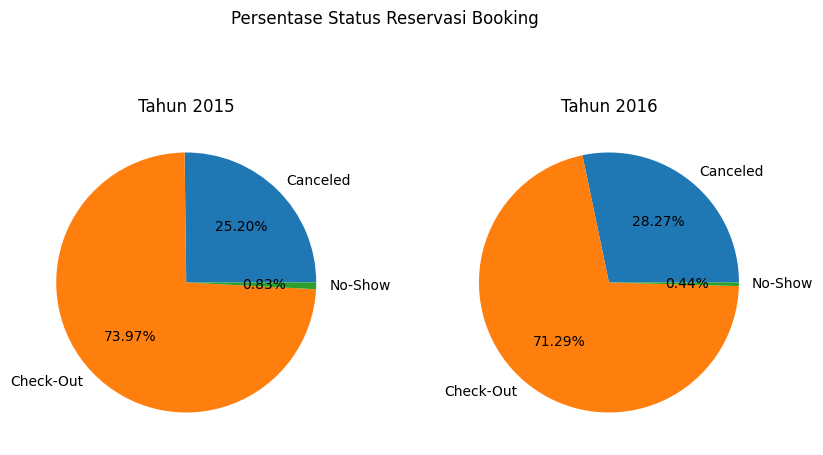

In [86]:
# Visualisasi rasio status reservasi booking pada tahun 2015 dan 2016
fig, axes = plt.subplots(ncols=2,figsize=(10,5))

axes[0].pie(status_reservasi_q34_df[2015], labels=status_reservasi_q34_df['reservation_status'], autopct='%.2f%%') 
axes[0].set_title('Tahun 2015')

axes[1].pie(status_reservasi_q34_df[2016], labels=status_reservasi_q34_df['reservation_status'], autopct='%.2f%%') 
axes[1].set_title('Tahun 2016')

fig.suptitle("Persentase Status Reservasi Booking")
fig.subplots_adjust(top=0.76) #Position setting from the suptitle

Secara umum, urutan status reservasi pada kedua tahun tersebut adalah persentase status **No-Show < Canceled < Check-Out**. Tetapi, terdapat perbedaan rasio perbedaan status reservasi pada tahun 2015 dan 2016. Pada tahun **2015**, status **Check-Out** memiliki persentase sebanyak **73.97%**, **Canceled 25.20%**, dan **No-Show 0.83%**. Sementara itu, pada tahun **2016**, status **Check-Out** memiliki persentase sebanyak **71.29%**, **Canceled 28.27%**, dan **No-Show 0.44%**.

Berdasarkan persentase ini, status Check-out artinya **hanya ada sekitar ~71-74% customer benar-benar datang ke resort** dari seluruh booking. Terdapat sebanyak **~26-29% customer tidak datang atau melakukan pembatalan**. Persentase customer tidak datang cukup signifikan sehingga perlu dilakukan tindakan terutama untuk customer yang membatalkan booking. Apabila customer melakukan pembatalan, selain occupancy rate yang tidak sesuai dari perkiraan jumlah booking, bisa saja terdapat lead yang sebenarnya ingin booking tetapi pada saat ingin booking sudah dipenuhi slotnya oleh customer yang melakukan pembatalan. Hal ini tentu saja merugikan resort terkait *occupancy rate* dan pada akhirnya pemasukan. Untuk itu, resort perlu **membuat dan menerapkan syarat dan ketentuan yang bisa menjadi tindakan preventif kerugian akibat booking yang dibatalkan**.

### Perbedaan rata-rata rate per malam pada akhir pekan, hari kerja, dan keduanya

In [87]:
# Filter sesuai kategori weekends, weekdays, dan both
adr_co_weekends = resort_analyze_df['avg_daily_rate'][(resort_analyze_df['stays_in_week_nights'] == 0) & (resort_analyze_df['stays_in_weekend_nights'] > 0) & (resort_analyze_df['reservation_status'] == 'Check-Out')]
adr_co_weekdays = resort_analyze_df['avg_daily_rate'][(resort_analyze_df['stays_in_week_nights'] > 0) & (resort_analyze_df['stays_in_weekend_nights'] == 0) &  (resort_analyze_df['reservation_status'] == 'Check-Out')]
adr_co_both = resort_analyze_df['avg_daily_rate'][(resort_analyze_df['stays_in_week_nights'] > 0) & (resort_analyze_df['stays_in_weekend_nights'] > 0) & (resort_analyze_df['reservation_status'] == 'Check-Out')]

Setiap variabel `adr_co_weekends`, `adr_co_weekdays`, dan `adr_co_both` masing-masing menyimpan data dengan status reservasi Check-Out pada booking di weekend saja, weekday saja, atau keduanya. Untuk mengetahui signifikansi perbedaan antara ketiga variabel ini, akan dilakukan *hypothesis testing*. Terdapat tiga variabel yang ingin dibandingkan sehingga hypothesis testing dilakukan dengan menggunakan ANOVA Test. Tetapi, ANOVA test memiliki syarat bahwa distribusi datanya harus normal. Maka, perlu dicek distribusi masing-masing series dengan melihat nilai skewness.

In [88]:
# Melihat kecondongan data adr
print(f"Nilai skewness adr pada weekend: {adr_co_weekends.skew()}")
print(f"Nilai skewness adr pada weekday: {adr_co_weekdays.skew()}")
print(f"Nilai skewness adr pada keduanya: {adr_co_both.skew()}")

Nilai skewness adr pada weekend: 1.7608749524620948
Nilai skewness adr pada weekday: 1.5732498082060107
Nilai skewness adr pada keduanya: 1.230343310575931


Nilai skewness pada setiap kategori nilainya positif dan lebih dari 1. Artinya seluruh kategori datanya cenderung condong ke kiri (**positive skewness**). Positive skewness artinya data memiliki banyak outlier yang sangat besar dibandingkan dengan data berdistribusi normal. Agar kecondongan data berkurang dan data mendekati distribusi normal maka outlier perlu ditindak lanjuti.

In [89]:
# Fungsi untuk filter outlier dengan menggunakan Tukey's Rule
def filterOutliersTukeys(series):
    '''
        Fungsi ini bertujuan untuk melakukan filter outlier pada sebuah series
        - (Params) series: pd.series yang berisi data yg ingin di filter dari outliernya
        - return: series yang berisi data non outlier

        Contoh penggunaan:
        non_outlier = filterOutlierTukeys(series)
    '''
    # kalkulasi iqr
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    # Menggunakan iqr karena bukan distribusi normal (Tukey's)
    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr

    # identifikasi dan filter outlier & non-outlier
    outliers = series[(series < low_bound) | (series > up_bound)]
    non_outliers = series[(series >= low_bound) & (series <= up_bound)]

    print(f"Persentase outlier: {len(outliers)*100/len(series):.2f}%")
    return non_outliers

Membuat fungsi `filterOutlierTukeys` yang memiliki 1 parameter series. Fungsi ini berguna untuk melakukan filter outlier dan mengembalikan series dengan data valid (non-outlier).

In [90]:
# Filter outlier pada setiap kategori
adr_co_weekends_non_outlier = filterOutliersTukeys(adr_co_weekends)
adr_co_weekdays_non_outlier = filterOutliersTukeys(adr_co_weekdays)
adr_co_both_non_outlier = filterOutliersTukeys(adr_co_both)

print('---')

# Melihat kecondongan data tanpa outlier
print(f"Skewness adr_co_weekends_non_outlier: {adr_co_weekends_non_outlier.skew()}")
print(f"Skewness adr_co_weekdays_non_outlier: {adr_co_weekdays_non_outlier.skew()}")
print(f"Skewness adr_co_both_non_outlier: {adr_co_both_non_outlier.skew()}")

Persentase outlier: 8.20%
Persentase outlier: 6.06%
Persentase outlier: 3.04%
---
Skewness adr_co_weekends_non_outlier: 0.9281181470927823
Skewness adr_co_weekdays_non_outlier: 1.053634726879616
Skewness adr_co_both_non_outlier: 0.9045791358946337


Terlihat bahwa outlier pada masing-masing series per kategori sudah dideteksi dan dibersihkan. Terjadi pergeseran nilai skewness setelah outlier dibuang dari ~1.2 - 1.7 menjadi ~0.9 - 1. Meskipun distribusi belum normal sempurna (-0.5 <= x <= 0.5), nilai skewness sudah semakin mendekati 0.5. Sehingga series saat ini sudah dapat diasumsikan sudah mengikuti distribusi normal dan hypothesis testing dengan ANOVA test dapat dilakukan. Tetapi, dapat diasumsikan bahwa akurasi perbedaan signifikan ini tidak sepenuhnya akurat.

**Hipotesis**  

**H0**: Tidak terdapat perbedaan yang signifikan antara rata-rata Avg. Daily Rate pada hari kerja (weekdays), akhir pekan (weekends), dan keduanya (both)  
**H1**: Paling tidak terdapat satu kategori antara weekdays, weekends, dan both yang rata-rata Avg. Daily Rate-nya berbeda secara signifikan dibandingkan kategori lain

In [91]:
res = stats.f_oneway(adr_co_weekends_non_outlier, adr_co_weekdays_non_outlier, adr_co_both_non_outlier)
print('P-value:',res.pvalue)

P-value: 6.647234001854548e-269


Nilai p-value testing adalah **6.647234001854548e-269**. P-value tersebut sangat kecil dan mendekati 0 artinya terdapat perbedaan yang signifikan dan H0 ditolak. Artinya H1 diterima dan terdapat paling tidak satu kategori yang rata-rata adr-nya berbeda secara signifikan dengan kategori lain.

Terdapat perbedaan yang signifikan secara statistik paling tidak pada hari kerja, akhir pekan, atau keduanya. Untuk itu, dapat diketahui bahwa resort menetapkan rate yang berbeda secara signifikan bergantung pada jenis kedatangan customer.

### Menyimpan data yang sudah dianalisis

In [92]:
resort_analyze_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39666 entries, 0 to 39665
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           39666 non-null  object 
 1   is_canceled                     39666 non-null  int64  
 2   lead_time                       39666 non-null  int64  
 3   arrival_date_year               39666 non-null  int64  
 4   arrival_date_month              39666 non-null  object 
 5   arrival_date_week_number        39666 non-null  int64  
 6   arrival_date_day_of_month       39666 non-null  int64  
 7   stays_in_weekend_nights         39666 non-null  int64  
 8   stays_in_week_nights            39666 non-null  int64  
 9   adults                          39666 non-null  int64  
 10  children                        39666 non-null  int64  
 11  babies                          39666 non-null  int64  
 12  meal                            

In [94]:
# Menyimpan data yang sudah dianalisis
resort_analyze_df.to_csv('dataset/resort_analyzed.csv', index=False)

## **Pengambilan Kesimpulan**

Berdasarkan analisis pada dataset Hotel Booking Demand, dapat diketahui beberapa hal terkait meningkatkan *occupancy rate* pada Q3 - Q4. Jumlah booking paling banyak ada pada bulan **Juli** dan **Agustus**. Pada dua bulan ini, rata-rata rate per hari yang dipatok sangat tinggi. Untuk itu, resort A dapat melakukan __*upsell*__ pada periode ini karena keinginan oleh customer juga sangat tinggi. Periode ini harus digunakan sebaik mungkin karena pemasukan bisa dimaksimalkan.

Sementara itu, secara tren, bulan **November** merupakan bulan yang jumlah booking dan rata-rata rate per harinya sangat rendah. Pada periode ini, resort A bisa membuat suatu promosi atau campaign yang berfokus untuk meningkatkan traffic booking dan *occupancy rate*. Pada periode ini, lebih baik mematok rate per malam sesuai dengan range median dan modusnya. Apabila ingin dinaikkan jangan terlalu signifikan karena khawatir akan mengurangi traffic booking dan *occupancy rate*. Untuk mematok rate juga bisa mempertimbangkan dengan kapan kedatangan customer (hari kerja, akhir pekan, atau keduanya). Hal ini dikarenakan rata-rata keseluruhan dari rata-rata rate per hari memiliki perbedaan yang signifikan.

Segmen customer yang paling banyak di resort adalah **Couple**. Sehingga, apabila membuat suatu promosi atau campaign segmen ini yang harus menjadi prioritas atau target utama karena persentasenya sangat signifikan dari segmen lain. Dengan memanfaatkan segmen paling besar diharapkan dapat memaksimalkan occupancy rate dan pada akhirnya meningkatkan pemasukan pula. Rasio pembatalan dan no-show pada sebuah booking masih signifikan terhadap customer yang benar-benar datang ke hotel. Hal ini perlu ditindak lanjuti karena bisa merugikan resort. Untuk itu, perlu menerapkan syarat dan ketentuan yang bisa manjadi tindakan preventif resort merugi.